In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
NUMBER_OF_ROWS = 100000

In [3]:
import json

def load_data(file_name, head=NUMBER_OF_ROWS):
    count = 0
    data = []
    with open(file_name, 'r') as fin:
        for line in fin:
            d = json.loads(line)
            count += 1
            data.append(d)
            
            if head is not None and count >= head:
                break
    return data


In [4]:
book_data = load_data("./data/archive/goodreads_books.json")
authors_data = load_data("./data/archive/goodreads_book_authors.json")
reviews_data = load_data("./data/archive/goodreads_reviews_dedup.json")
genres_data = load_data("./data/archive/goodreads_book_genres_initial.json")
works_data = load_data("./data/archive/goodreads_book_works.json")
series_data = load_data("./data/archive/goodreads_book_series.json")

In [5]:
book_df = pd.DataFrame(book_data)
authors_df = pd.DataFrame(authors_data)
reviews_df = pd.DataFrame(reviews_data)
genres_df = pd.DataFrame(genres_data)
works_df = pd.DataFrame(works_data)
series_df = pd.DataFrame(series_data)
book_user_df = pd.read_csv("./data/archive/goodreads.csv", nrows=NUMBER_OF_ROWS)

In [6]:
book_user_df.columns

Index(['user_id', 'book_id', 'is_read', 'rating', 'is_reviewed'], dtype='object')

In [7]:
def data_preprocessing_pipeline(data):
    print(data.isnull().sum())

    columns_to_check = ['average_rating', 'ratings_count', 'title', 'isbn', 'authors']
    columns_to_convert = ['text_reviews_count', 'average_rating', 'publication_month', 'publication_year', 'ratings_count', 'num_pages', 'book_id']
    columns_to_drop = ['url', 'image_url']

    for column in columns_to_check:
        if column in data.columns:
            data.dropna(subset=[column], inplace=True)
    
    # Avoid list and dict for detect duplicates
    list_columns = [
        col for col in data.columns
        if any(not isinstance(val, list) and not isinstance(val, dict) for val in data[col])
    ]

    data = data.drop_duplicates(subset=list_columns, keep='first')

    # Convert data to numeric type
    for column in columns_to_convert:
        if column in data.columns:
            data[column] = pd.to_numeric(data[column], errors='coerce') 
    
    # Check if rating are in the correct range
    if 'average_rating' in data.columns:
        data = data[(data['average_rating'] >= 1) & (data['average_rating'] <= 5)]

    # Drop unnecessary columns
    data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    return data

In [8]:
book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [9]:
book_df = data_preprocessing_pipeline(book_df)
authors_df = data_preprocessing_pipeline(authors_df)
reviews_df = data_preprocessing_pipeline(reviews_df)
genres_df = data_preprocessing_pipeline(genres_df)
works_df = data_preprocessing_pipeline(works_df)
series_df = data_preprocessing_pipeline(series_df)
book_user_df = data_preprocessing_pipeline(book_user_df)

isbn                    0
text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
asin                    0
is_ebook                0
average_rating          0
kindle_asin             0
similar_books           0
description             0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
isbn13                  0
publication_month       0
edition_information     0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64
average_rating        0
author_id             0
text_reviews_count    0
name                  0
ratings_count         0
dtype: int64
user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added

<h3> Informações sobre autores </h3>

In [10]:
# Average rating
# TODO: use dataframe directly here instead of converting json list

avg_author_rating = 0.0
avg_author_reviews = 0.0

for author in authors_data:
    avg_author_rating += float(author['average_rating'])
    avg_author_reviews += float(author['text_reviews_count'])

avg_author_rating /= NUMBER_OF_ROWS
avg_author_reviews /= NUMBER_OF_ROWS


authors_by_rating_count = [(author['name'], int(author['ratings_count'])) for author in authors_data]
authors_by_average_rating = [(author['name'], float(author['average_rating'])) for author in authors_data if float(author['ratings_count']) >= 100]

df_rating_count = pd.DataFrame(authors_by_rating_count, columns=['name', 'ratings_count'])
df_average_rating = pd.DataFrame(authors_by_average_rating, columns=['name', 'average_rating'])

df_rating_count_sorted = df_rating_count.sort_values(by='ratings_count', ascending=False)
df_average_rating_sorted = df_average_rating.sort_values(by='average_rating', ascending=False)

Text(0, 0.5, 'Amount of reviews')

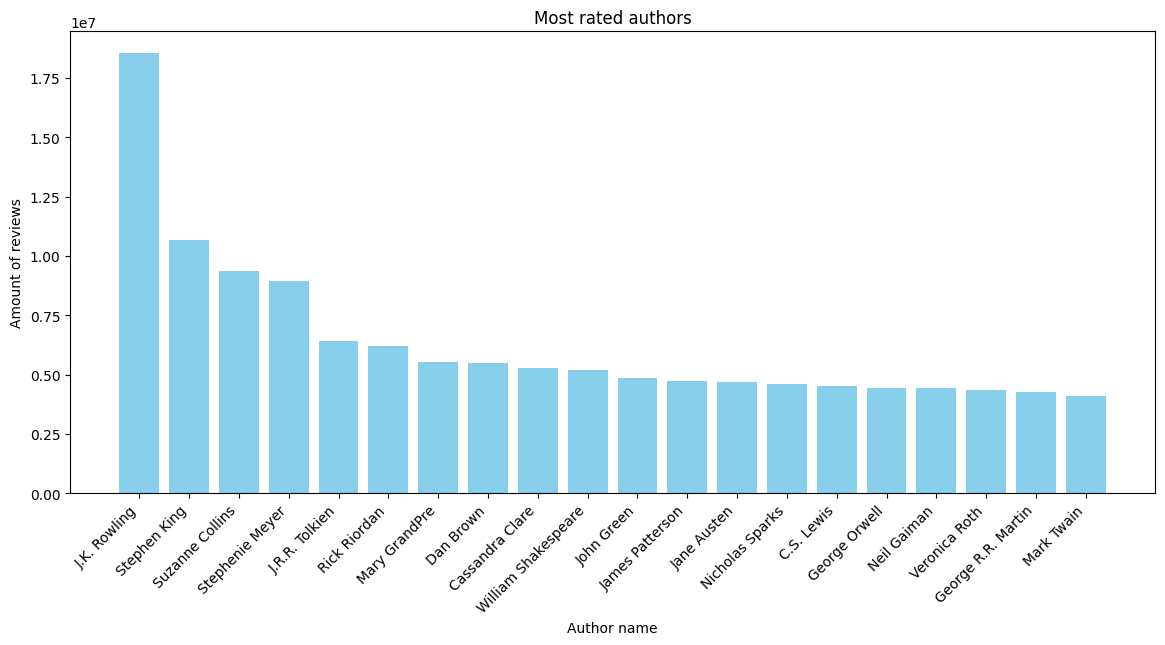

In [11]:
# Most rated authors

plt.figure(figsize=(14, 6))

plt.bar(df_rating_count_sorted['name'][0:20], df_rating_count_sorted['ratings_count'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Most rated authors")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

Text(0, 0.5, 'Amount of reviews')

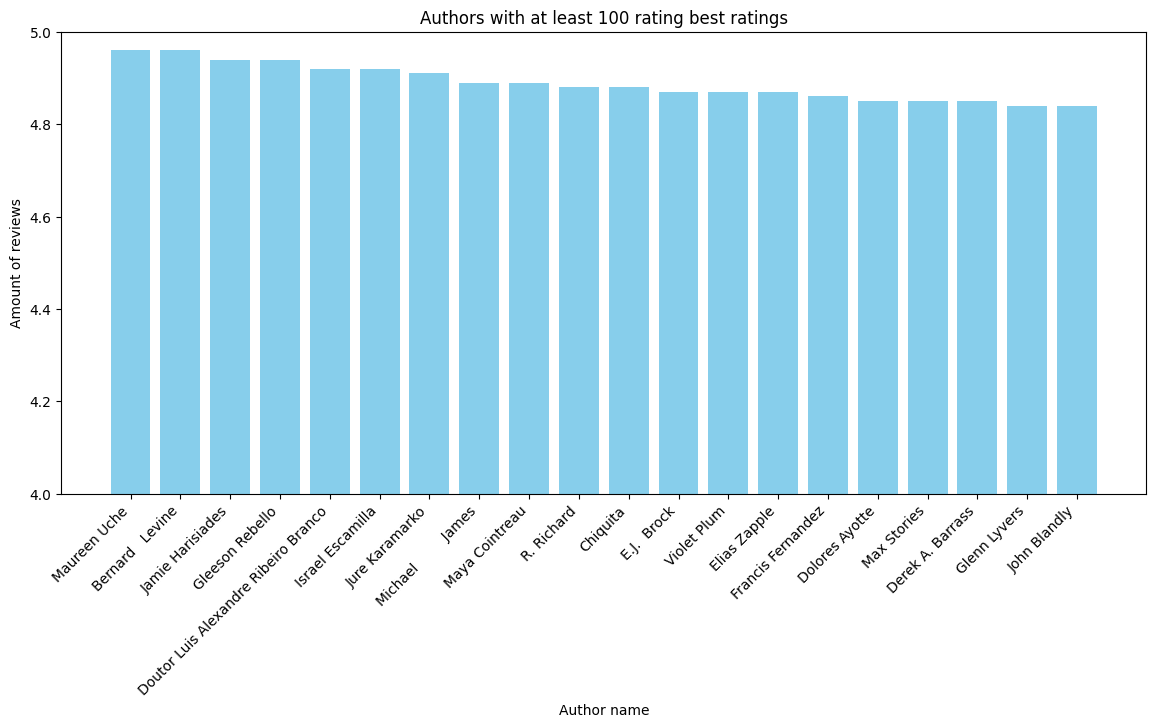

In [12]:
# Greatest ratings for players with at least 100 ratings

plt.figure(figsize=(14, 6))
plt.bar(df_average_rating_sorted['name'][0:20], df_average_rating_sorted['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(4,5)
plt.title("Authors with at least 100 rating best ratings")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

In [13]:
## All authors average rating

print(avg_author_rating)

3.869707500000017


In [14]:
# Average number of reviews per author

print(avg_author_reviews)

674.95166


<h3> Books info </h3>

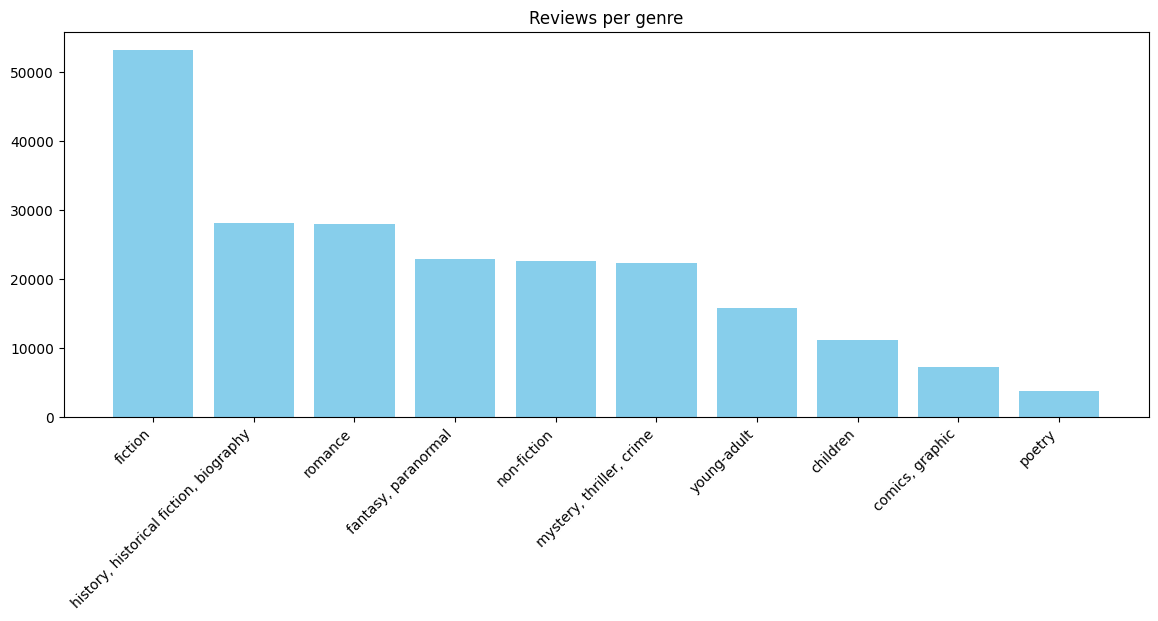

In [15]:
total_genres = {}

def get_genres(row):
    genre_list = [genre.strip() for genre in row['genres']]
    return genre_list

for idx, row in genres_df.iterrows():
    genres = get_genres(row)

    for genre in genres:
        if genre in total_genres:
            total_genres[genre] += 1
        else:
            total_genres[genre] = 1

sorted_genres_by_number_of_reviews = dict(sorted(total_genres.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.title("Reviews per genre")
plt.bar(sorted_genres_by_number_of_reviews.keys(), sorted_genres_by_number_of_reviews.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

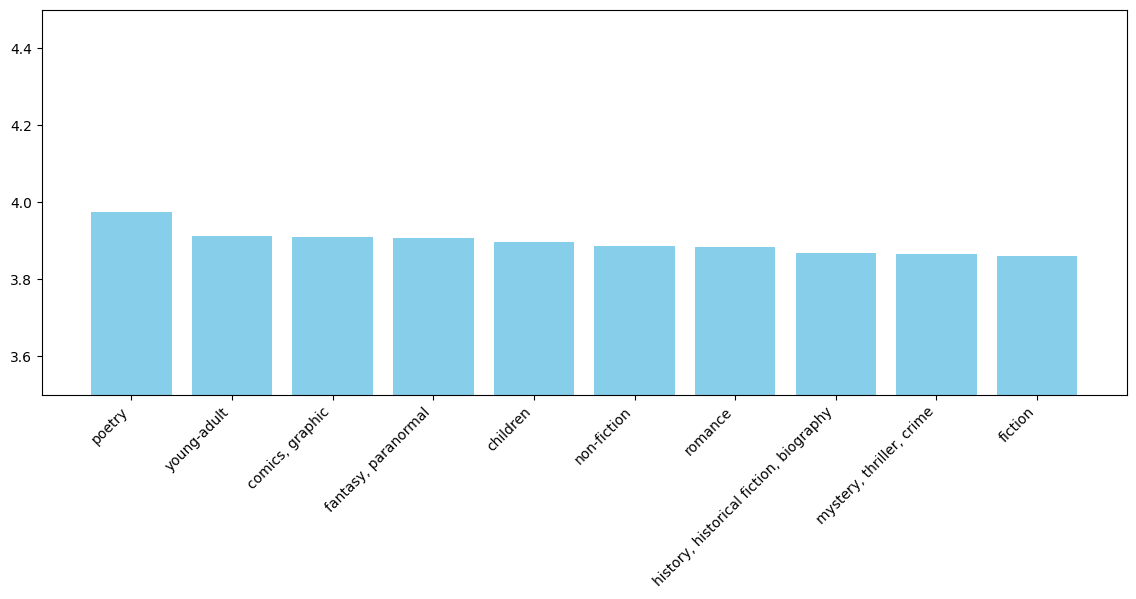

In [16]:
from collections import defaultdict

book_ratings = dict(zip(book_df['book_id'], book_df['average_rating']))

genres_rating_sum = defaultdict(float)
genres_count = defaultdict(int)

for idx, row in genres_df.iterrows():
    book_id = row['book_id']
    genres = get_genres(row)
    book_rating = book_ratings.get(book_id, 0) 

    for genre in genres:
        genres_rating_sum[genre] += float(book_rating)
        genres_count[genre] += 1

genres_rating_avg = {genre: genres_rating_sum[genre] / genres_count[genre] for genre in genres_rating_sum}

sorted_genres_by_rating = dict(sorted(genres_rating_avg.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.ylim(3.5, 4.5)
plt.bar(sorted_genres_by_rating.keys(), sorted_genres_by_rating.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

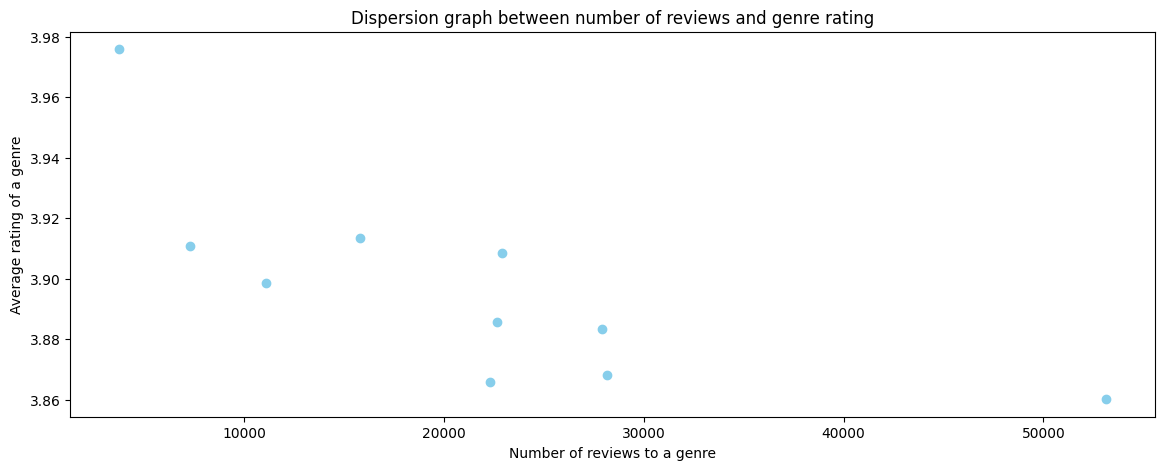

In [17]:
plt.figure(figsize=(14, 5))
plt.title("Dispersion graph between number of reviews and genre rating")
plt.xlabel("Number of reviews to a genre")
plt.ylabel("Average rating of a genre")
plt.scatter(total_genres.values(), genres_rating_avg.values(), c="skyblue")
plt.show()

In [18]:
# Livros mais bem avaliados
book_df['ratings_count'] = pd.to_numeric(book_df['ratings_count'])
books_1000_ratings = book_df[book_df['ratings_count'] >= 1000]
books_1000_ratings_best = books_1000_ratings.sort_values(by='average_rating', ascending=False)
books_1000_ratings_worst = books_1000_ratings.sort_values(by='average_rating', ascending=True)

/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12527 (\N{KATAKANA LETTER WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodreads-book-review/goodreads/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jeferson/ufpe/goodr

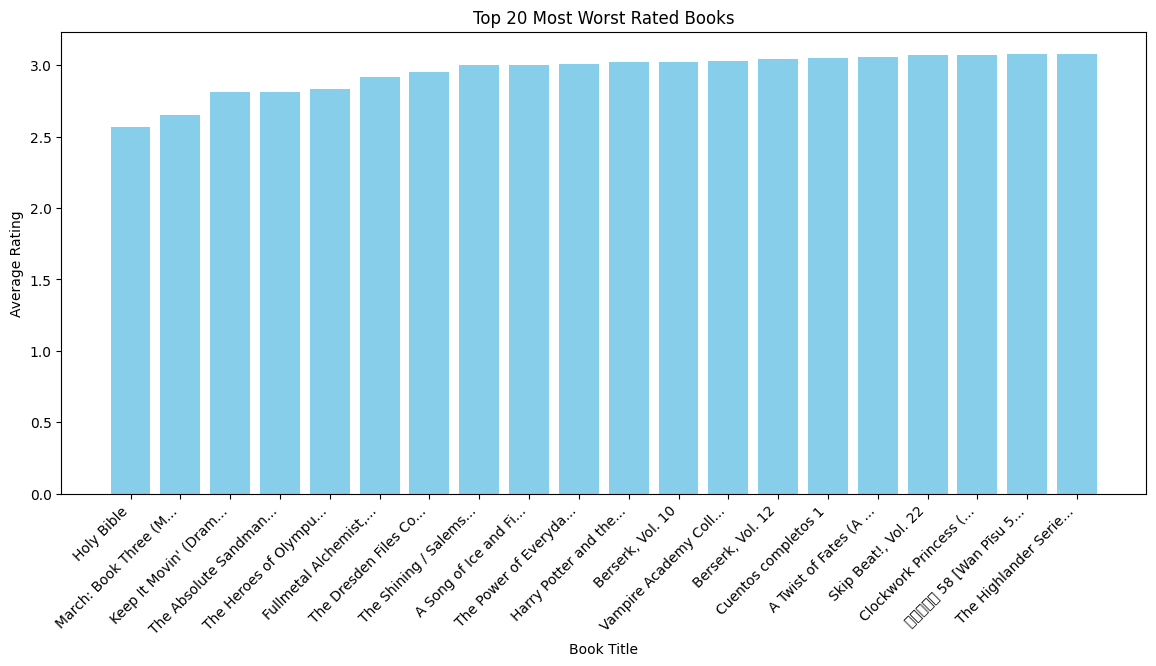

In [19]:
truncated_titles = []

for title in books_1000_ratings_best['title'][0:20]:
    if len(title) >= 20:
        title = title[0:20] + "..."
    truncated_titles.append(title)

plt.figure(figsize=(14, 6)) 
plt.bar(truncated_titles, books_1000_ratings_worst['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Worst Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()

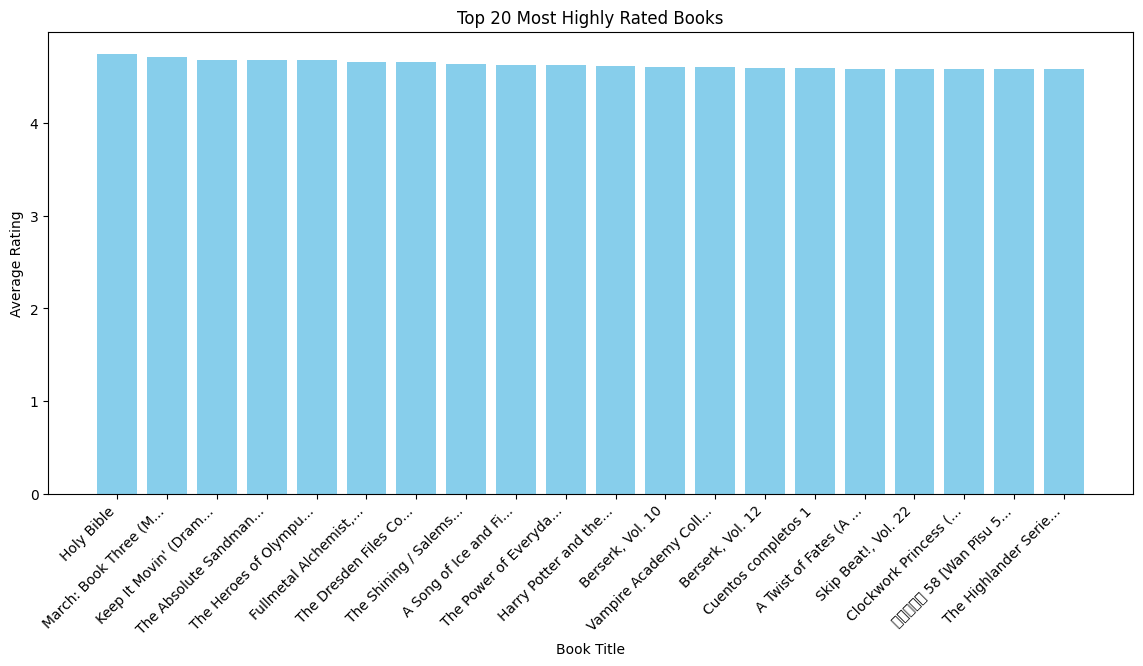

In [20]:
truncated_titles = []

for title in books_1000_ratings_best['title'][0:20]:
    if len(title) >= 20:
        title = title[0:20] + "..."
    truncated_titles.append(title)

plt.figure(figsize=(14, 6))
plt.bar(truncated_titles, books_1000_ratings_best['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Highly Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()

<h3> Preparação dos dados para modelagem </h3>

In [21]:
book_df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series'],
      dtype='object')

In [22]:
# genero, numero de avaliaçoes, media de avaliações, autor, 

book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1.0,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,1,9780312853129,9.0,,1984.0,5333265,3.0,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6.0,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,1,9780743509985,10.0,Abridged,2001.0,1333909,10.0,1323437,Good Harbor,Good Harbor
2,,7.0,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,,NaN,Book Club Edition,1987.0,7327624,140.0,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282.0,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,14,9780743294294,7.0,,2009.0,6066819,51184.0,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5.0,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,9780850308716,NaN,,NaN,287140,15.0,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [23]:
# Drop unnecessary columns
books_df_model = book_df[["book_id", "average_rating", "ratings_count"]]
books_df_model

,book_id,average_rating,ratings_count
0,5333265,4.00,3.0
1,1333909,3.23,10.0
2,7327624,4.03,140.0
3,6066819,3.49,51184.0
4,287140,3.40,15.0
...,...,...,...
99995,36110147,4.50,10.0
99996,24679885,4.19,95.0
99997,27883170,3.51,276.0
99998,35992614,4.33,15.0


In [24]:
books_df_model = books_df_model.merge(genres_df[['book_id', 'genres']], on='book_id', how='left')

In [25]:
df_expanded = books_df_model['genres'].apply(lambda x: list(x.keys()))

one_hot_encoded = df_expanded.apply(lambda genres: pd.Series({genre: 1 for genre in genres}))
one_hot_encoded = one_hot_encoded.fillna(0).astype(int)

books_df_model = books_df_model.drop(columns="genres")

In [26]:
books_df_model = pd.concat([books_df_model, one_hot_encoded],  axis=1)

In [27]:
books_df_model['average_rating'] = books_df_model['average_rating'].replace('', np.nan).astype(float)
books_df_model['book_avaliation'] = np.where(books_df_model['average_rating'] >= 4.0, 1, 0)

In [28]:
books_df_model

,book_id,average_rating,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",book_avaliation
0,5333265,4.00,3.0,1,0,0,0,0,0,0,0,0,0,1
1,1333909,3.23,10.0,1,1,0,0,0,0,0,0,0,0,0
2,7327624,4.03,140.0,0,1,1,1,1,0,0,0,0,0,1
3,6066819,3.49,51184.0,0,1,0,1,0,1,0,0,0,0,0
4,287140,3.40,15.0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99697,36110147,4.50,10.0,0,0,0,0,0,0,0,0,0,0,1
99698,24679885,4.19,95.0,0,1,1,1,0,0,0,1,1,0,1
99699,27883170,3.51,276.0,1,1,1,1,0,0,0,0,1,0,0
99700,35992614,4.33,15.0,0,0,0,0,0,1,0,0,0,0,1


In [29]:
books_df_model['average_rating'] = pd.to_numeric(books_df_model['average_rating']) 
books_df_model['book_id'] = pd.to_numeric(books_df_model['book_id']) 
books_df_model['ratings_count'] = pd.to_numeric(books_df_model['ratings_count']) 

In [30]:
books_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99702 entries, 0 to 99701
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   book_id                                 99702 non-null  int64  
 1   average_rating                          99702 non-null  float64
 2   ratings_count                           99702 non-null  float64
 3   history, historical fiction, biography  99702 non-null  int64  
 4   fiction                                 99702 non-null  int64  
 5   fantasy, paranormal                     99702 non-null  int64  
 6   mystery, thriller, crime                99702 non-null  int64  
 7   poetry                                  99702 non-null  int64  
 8   romance                                 99702 non-null  int64  
 9   non-fiction                             99702 non-null  int64  
 10  children                                99702 non-null  in

In [31]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['ratings_count', 'average_rating']

scaler = StandardScaler()
books_df_model[columns_to_scale] = scaler.fit_transform(books_df_model[columns_to_scale])

In [32]:
data_preprocessing_pipeline(books_df_model)

book_id                                   0
average_rating                            0
ratings_count                             0
history, historical fiction, biography    0
fiction                                   0
fantasy, paranormal                       0
mystery, thriller, crime                  0
poetry                                    0
romance                                   0
non-fiction                               0
children                                  0
young-adult                               0
comics, graphic                           0
book_avaliation                           0
dtype: int64


,book_id,average_rating,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",book_avaliation
6,378460,1.013728,-0.046847,0,1,0,0,0,0,0,0,0,0,1
18,89378,1.114538,0.112069,0,1,0,0,0,0,1,1,1,0,1
26,287142,1.255671,-0.048051,0,0,0,0,0,0,0,0,0,0,1
29,18628482,1.658910,-0.045762,0,0,0,0,0,0,0,0,1,0,1
35,24994796,1.255671,-0.048051,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99679,10783481,1.114538,-0.047449,0,0,0,0,0,0,0,0,0,0,1
99682,10783485,1.054052,-0.047690,0,0,0,0,1,0,0,0,0,0,1
99687,19305915,1.921015,-0.047570,0,0,0,0,0,0,0,0,0,0,1
99691,34856759,1.013728,-0.045521,0,0,0,0,0,0,0,0,0,0,1


In [33]:
y = books_df_model["book_avaliation"]
X_scaled_train = books_df_model.drop(columns=["book_id", "book_avaliation"])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_class = logistic_regression.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
score = f1_score(y_test, y_pred_class)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {score}")

Acurácia: 0.9948347625495211
Precisão: 0.9904851403735463
Recall: 0.9973976815708541
F1 score: 0.9939293923498556


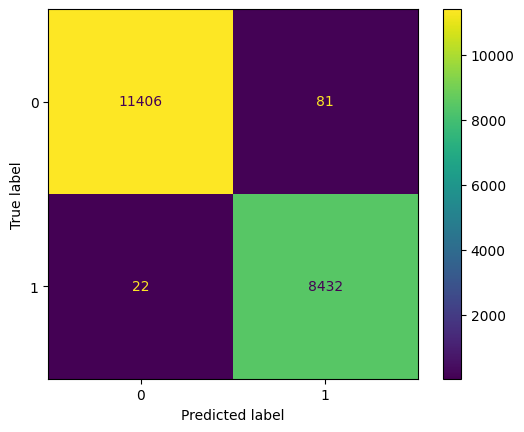

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

<h3> Criando modelo com Random Forest </h3>

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)

In [39]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {score}")

Acurácia: 0.9991976330174014
Precisão: 1.0
Recall: 0.9981074047788029
F1 score: 0.9990528060620412


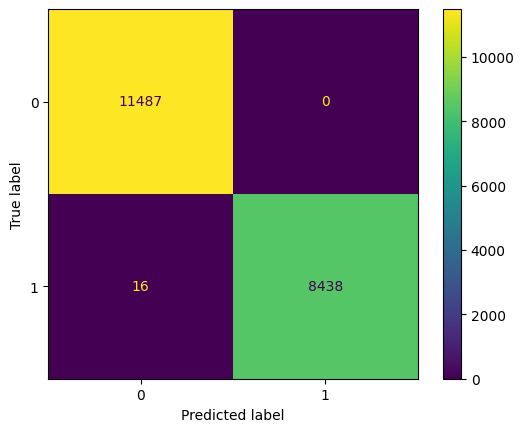

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_forest.classes_)
disp.plot()
plt.show()

<h3> Recommendation system </h3>

In [42]:
book_user_df

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
99995,227,882,1,3,0
99996,227,59168,1,3,0
99997,227,24428,1,3,0
99998,227,59167,1,2,0


In [43]:
recommender_system = book_user_df.drop(columns="is_reviewed")
recommender_system

,user_id,book_id,is_read,rating
0,0,948,1,5
1,0,947,1,5
2,0,946,1,5
3,0,945,1,5
4,0,944,1,5
...,...,...,...,...
99995,227,882,1,3
99996,227,59168,1,3
99997,227,24428,1,3
99998,227,59167,1,2


In [44]:
user_book_table = recommender_system.pivot_table(index=['book_id'], columns=['user_id'], values=['rating']).fillna(0)

In [45]:
user_book_table

rating                                               ...            \
user_id    0    1    2    3    4    5    6    7    8    9    ...  218  219   
book_id                                                      ...             
0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59275      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
59276      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
59277      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
59278      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
59279      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                 
user_id  220  221  222  223  224  225  226  227  
book_id                                          
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  
59275    0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  
59276    0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  
59277    0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  
59278    0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  
59279    0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  

[59139 rows x 228 columns]

In [77]:
query_index = 41916

In [78]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_book_table_matrix = csr_matrix(user_book_table.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_book_table_matrix)
distances, indices = model_knn.kneighbors(user_book_table.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [79]:
book = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        book.append(user_book_table.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(book,name='book')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)


Recommendations for 41916:

0: 41921, with distance of 0.0
1: 41922, with distance of 0.0
2: 41923, with distance of 0.0
3: 41925, with distance of 0.0
4: 41927, with distance of 0.0


In [87]:
query = recommender_system[(recommender_system['book_id'] == query_index) & (recommender_system['rating'] >= 4)]

if not query.empty:
    print("User liked the book with ID: 41916, then we reccomend the following books: ")
    print('Recommendations for {0}:\n'.format(user_book_table.index[query_index]))
    for i in range(0,recommend.shape[0]):
        print('{0}: {1}, with distance of {2}'.format(i, recommend["book"].iloc[i], recommend["distance"].iloc[i]))

User liked the book with ID: 41916, then we reccomend the following books: 
Recommendations for 41916:

0: 41921, with distance of 0.0
1: 41922, with distance of 0.0
2: 41923, with distance of 0.0
3: 41925, with distance of 0.0
4: 41927, with distance of 0.0
